# Data Mining Final Project 2021 - 2022
## Authors: Beatriz Gonçalves (m20210695), Diogo Hipólito (m20210633) and Diogo Pereira (m20210657)

# 1) Introduction

The client, a Marketing Department from an an insurance company, wishes to better understand the scope of its clients, in order to better serve them and increase their ROI (Return On Investment). The group was given an ABT (Analytic Based Table), consisting of 10.290 customers and given the task of analyzing the table for evident groups of clusters, extracting the behaviour of said clusters and provide insights on how to better serve them.

The project is contained within a Github repository which can be accessed through the following link: https://github.com/beatrizctgoncalves/project_dm. This repository provides a Jupyter Notebook with all the relevant analysis and a report that summarizes the work done. Note that these two documents should be used together as they complement each other.

## 1.1: Setup Environment

...

## 1.2: Importing Packages

In [48]:
# Required imports for the project
#pip install sas7bdat

from sas7bdat import SAS7BDAT
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2) Importing and Assessing Data

In [2]:
new_file = open('sas7bdat_data.csv', 'w')
with SAS7BDAT('a2z_insurance.sas7bdat') as file_sas:
    for row in file_sas:
        new_file.write(str(row) + '\n')

In [21]:
names_list = ['id','first_policy','birthday','education','salary','area','children','cmv','claims','motor','household','health','life','work_comp']

# Build Analytical Base Table (ABT)
df_insurance = pd.read_csv('sas7bdat_data.csv', delimiter=',', sep=r'\s*,\s*', names=names_list, header=None, skiprows=1, engine='python')

In [22]:
df_insurance.head()

,id,first_policy,birthday,education,salary,area,children,cmv,claims,motor,household,health,life,work_comp
0,[1.0,1985.0,1982.0,'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89]
1,[2.0,1981.0,1995.0,'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13]
2,[3.0,1991.0,1970.0,'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02]
3,[4.0,1990.0,1981.0,'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34]
4,[5.0,1986.0,1973.0,'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45]


In [24]:
# removing the '[' at the start of each row
df_insurance['id'].replace('\[', '', inplace=True, regex=True)

# removing the ']' at the ending of each row
df_insurance['work_comp'].replace('\]', '', inplace=True, regex=True)
    

In [25]:
df_insurance.head()

,id,first_policy,birthday,education,salary,area,children,cmv,claims,motor,household,health,life,work_comp
0,1.0,1985.0,1982.0,'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [26]:
# Dimension of the dataset
df_insurance.shape

(10261, 14)

In [27]:
# Data types of the variables
df_insurance.dtypes

id               object
first_policy     object
birthday         object
education        object
salary           object
area             object
children         object
cmv             float64
claims          float64
motor            object
household       float64
health           object
life             object
work_comp        object
dtype: object

In [35]:
# Correcting some data types
# "first_policy":int, "birthday":int, "salary":int, can't be converted due to NAs
df_insurance['id'] = (df_insurance['id'].astype(float)).astype(int)

In [37]:
# Get summary statistics from df
df_insurance.iloc[:,1:].describe(include='all')

,first_policy,birthday,education,salary,area,children,cmv,claims,motor,household,health,life,work_comp
count,10261,10261,10261,10261,10261,10261,10261.000000,10261.000000,10261,10261.000000,10261,10261,10261
unique,27,69,5,3563,5,3,NaN,NaN,1950,NaN,1006,612,898
top,1988.0,1962.0,'3 - BSc/MSc',None,4.0,1.0,NaN,NaN,None,NaN,None,9.89,None
freq,511,205,4783,36,4133,7236,NaN,NaN,34,NaN,43,130,84
mean,NaN,NaN,NaN,NaN,NaN,NaN,177.651897,0.743042,NaN,210.403937,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1949.032874,2.921853,NaN,352.863417,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,-165680.420000,0.000000,NaN,-75.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,-9.440000,0.390000,NaN,49.450000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,186.710000,0.720000,NaN,132.800000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,399.410000,0.980000,NaN,290.600000,NaN,NaN,NaN


In [38]:
# More info about df
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10261 non-null  int64  
 1   first_policy  10261 non-null  object 
 2   birthday      10261 non-null  object 
 3   education     10261 non-null  object 
 4   salary        10261 non-null  object 
 5   area          10261 non-null  object 
 6   children      10261 non-null  object 
 7   cmv           10261 non-null  float64
 8   claims        10261 non-null  float64
 9   motor         10261 non-null  object 
 10  household     10261 non-null  float64
 11  health        10261 non-null  object 
 12  life          10261 non-null  object 
 13  work_comp     10261 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.1+ MB


In [40]:
# Check duplicates
any(df_insurance.duplicated())

False

In [42]:
# Number of missing values in each feature
df_insurance.isna().sum()

id              0
first_policy    0
birthday        0
education       0
salary          0
area            0
children        0
cmv             0
claims          0
motor           0
household       0
health          0
life            0
work_comp       0
dtype: int64

In [43]:
# Frequencies of number of missing values across rows
df_insurance.isna().apply(lambda x:sum(x), axis=1).value_counts().sort_index()

0    10261
dtype: int64

In [44]:
# Define metric and non-metric datasets
metric_df = df_insurance.loc[:,(df_insurance.columns=="id") | (np.array(df_insurance.dtypes=="float64"))]
non_metric_df = df_insurance.loc[:,(df_insurance.columns=="id") | (np.array(df_insurance.dtypes=="object"))]

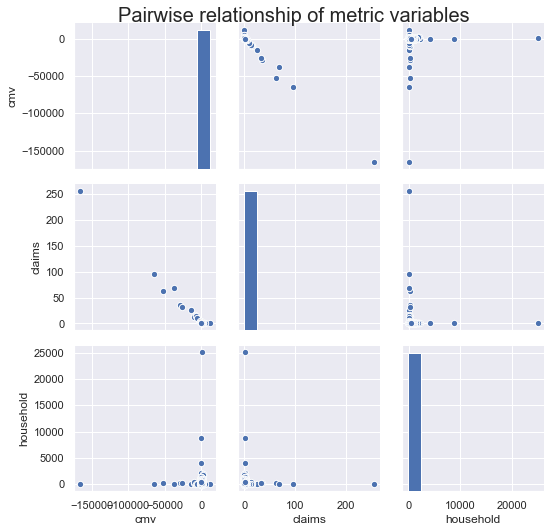

In [54]:
sns.set()

# Setting pairgrid
g = sns.PairGrid(metric_df.drop("id", 1).dropna())

# Populating pairgrid
mdg = g.map_diag(plt.hist, edgecolor="w")
mog = g.map_offdiag(plt.scatter, edgecolor="w", s=40)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise relationship of metric variables", fontsize=20)

plt.show()

In [52]:
### Acho que isto está estranho!